<a href="https://colab.research.google.com/github/Navjotkhatri/EDA-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [352]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [354]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/Play Store Data.csv"
ps_df=pd.read_csv(working_dir_path)

# ***Data framing and Data cleaning***

In [355]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [356]:
ps_df.shape

(10841, 13)

In [357]:
working_dir_path2="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/User Reviews.csv"
ps_df2=pd.read_csv(working_dir_path2)

In [358]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [359]:
ps_df2.shape

(64295, 5)

In [360]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [361]:
ps_df[ps_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [362]:
play_store_df=ps_df.drop(ps_df.index[[10472]])

In [363]:
play_store_df.shape

(10840, 13)

In [364]:
play_store_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [365]:
print(list(play_store_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [366]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [367]:
play_store_df = play_store_df.astype({"Reviews": int})

In [ ]:
play_store_df['Price'] = play_store_df['Price'].str.replace('$','')

In [369]:
play_store_df = play_store_df.astype({"Price": float})

In [ ]:
play_store_df['Installs'] = play_store_df['Installs'].str.replace(',','')
play_store_df['Installs'] = play_store_df['Installs'].str.replace('+','')
play_store_df = play_store_df.astype({"Installs": int})


In [371]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [372]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [373]:
df_df=play_store_df["App"].nunique()
df_df

9659

In [374]:
right_df=play_store_df.drop_duplicates(subset='App')
right_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [375]:
right_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [376]:
right_df.Rating.fillna(4.19, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [377]:
right_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [378]:
number_of_category=right_df["Category"].unique()
print(number_of_category)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [379]:
right_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19M,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [380]:
price_df=right_df[["App","Price","Type"]]
price_df

,App,Price,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,Free
1,Coloring book moana,0.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,Free
3,Sketch - Draw & Paint,0.0,Free
4,Pixel Draw - Number Art Coloring Book,0.0,Free
...,...,...,...
10836,Sya9a Maroc - FR,0.0,Free
10837,Fr. Mike Schmitz Audio Teachings,0.0,Free
10838,Parkinson Exercices FR,0.0,Free
10839,The SCP Foundation DB fr nn5n,0.0,Free


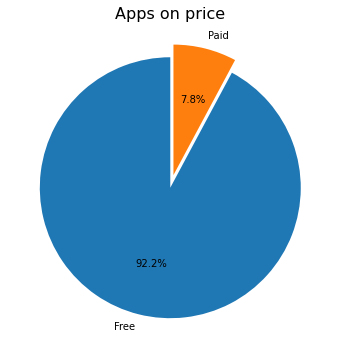

In [381]:
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(price_df.Type.value_counts(), labels=price_df.Type.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0, 0.1))
plt.show()


In [382]:
grouped = right_df[['App','Content Rating']]
grouped

,App,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [383]:
grouped1= grouped.rename(columns={'Content Rating': 'age_group'})
grouped1

,App,age_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


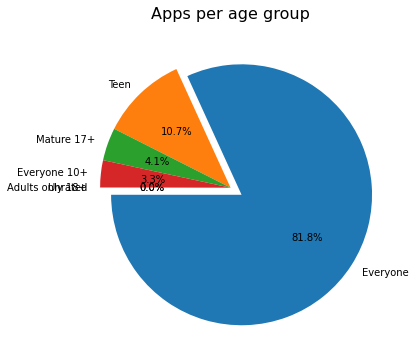

In [384]:
plt.figure(figsize=(10,6))
plt.title("Apps per age group",fontsize = 16)
plt.pie(grouped1.age_group.value_counts(), labels=grouped1.age_group.value_counts().index,autopct='%1.1f%%',startangle=180,explode=(0.1, 0,0,0,0,0))
plt.show()

In [385]:
versions=right_df["Android Ver"].value_counts().reset_index()
versions = versions.rename(columns={'index':'Android Ver','Android Ver': 'count'})
versions


,Android Ver,count
0,4.1 and up,2202
1,4.0.3 and up,1395
2,4.0 and up,1285
3,Varies with device,990
4,4.4 and up,818
5,2.3 and up,616
6,5.0 and up,512
7,4.2 and up,372
8,2.3.3 and up,273
9,2.2 and up,239


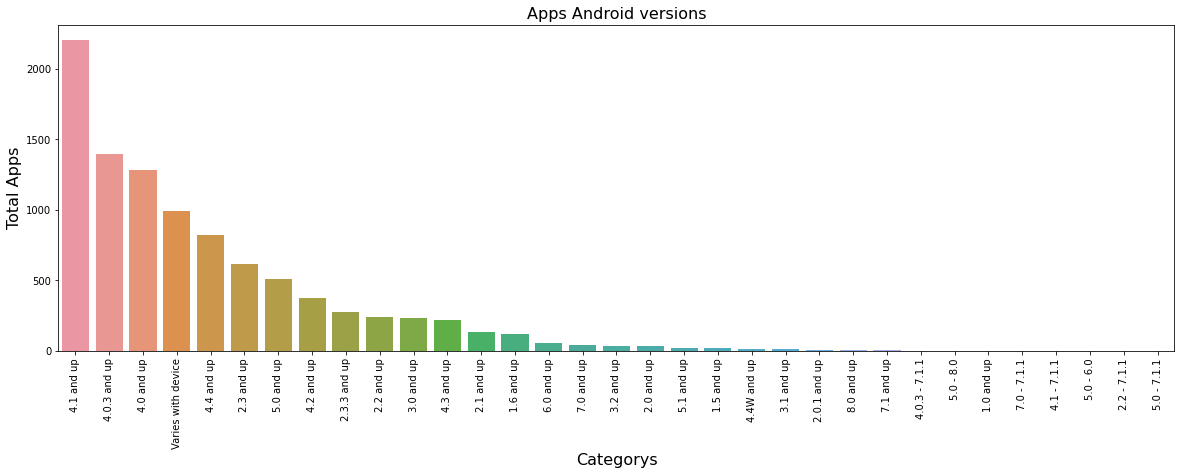

In [386]:
plt.figure(figsize=(20,6))
plt.title("Apps Android versions",fontsize=16)
sns.barplot(data=versions,x="Android Ver",y="count")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()


In [387]:
df=right_df.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df=df.sort_values(by=['Total Apps'],ascending=False)
df

,Category,Total Apps
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


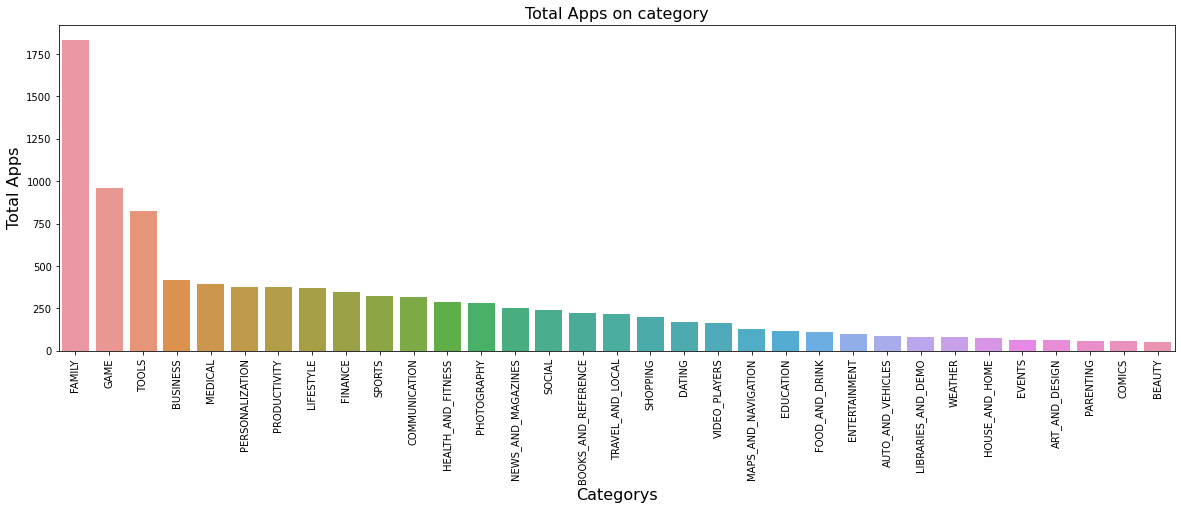

In [388]:
plt.figure(figsize=(20,6))
plt.title("Total Apps on category",fontsize=16)
sns.barplot(data=df,x="Category",y="Total Apps")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()

In [389]:
category=df.sort_values(by='Total Apps', ascending=False)
top_five_category=category.head()
least_five_category=category.tail()

In [390]:
top_five_category.reset_index()

,index,Category,Total Apps
0,11,FAMILY,1832
1,14,GAME,959
2,29,TOOLS,827
3,4,BUSINESS,420
4,20,MEDICAL,395


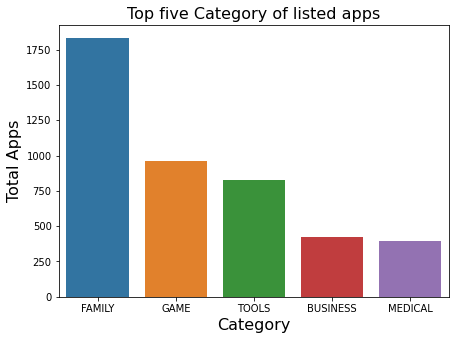

In [391]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=top_five_category, x="Category", y="Total Apps")
plt.title("Top five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [392]:
least_five_category.reset_index()

,index,Category,Total Apps
0,10,EVENTS,64
1,0,ART_AND_DESIGN,64
2,22,PARENTING,60
3,5,COMICS,56
4,2,BEAUTY,53


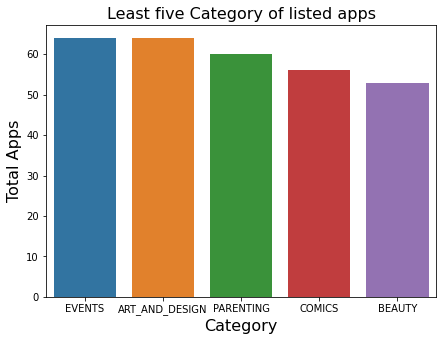

In [393]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=least_five_category, x="Category", y="Total Apps")
plt.title("Least five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [394]:
categories= right_df.groupby('Category')["Installs"].sum().reset_index()
category_installs_sum_df=categories.sort_values(by='Installs', ascending=False)
category_installs_sum_df

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


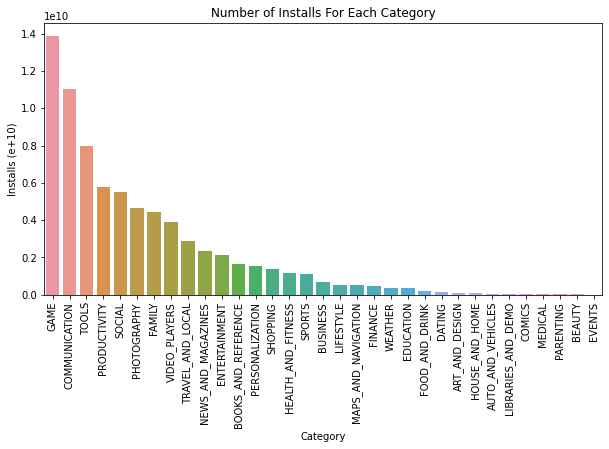

In [395]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

In [396]:
right_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [397]:
df1 =right_df[["App","Category","Rating","Reviews","Installs","Price","Type","Genres","Content Rating"]]
df1

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,10000,0.0,Free,Art & Design,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.90,967,500000,0.0,Free,Art & Design;Pretend Play,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,5000000,0.0,Free,Art & Design,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,50000000,0.0,Free,Art & Design,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,100000,0.0,Free,Art & Design;Creativity,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,5000,0.0,Free,Education,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,100,0.0,Free,Education,Everyone
10838,Parkinson Exercices FR,MEDICAL,4.19,3,1000,0.0,Free,Medical,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,1000,0.0,Free,Books & Reference,Mature 17+


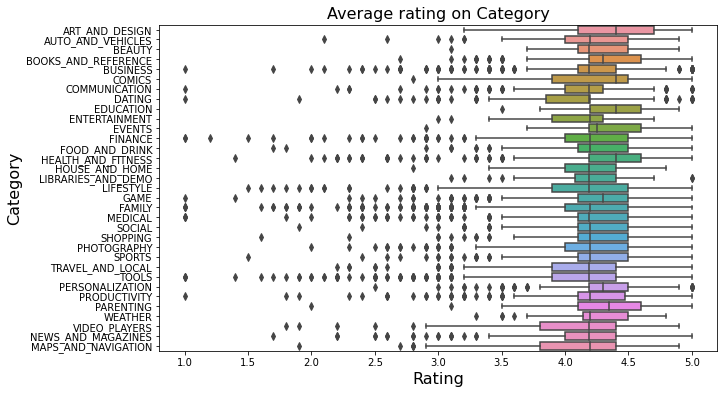

In [398]:
plt.figure(figsize=(10,6))
plt.title("Average rating on Category",fontsize=16)
sns.boxplot(y="Category",x ='Rating',data =df1)
plt.xlabel("Rating",fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.show()

In [399]:
print(np.array(list(df1["Installs"].unique())))

[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]


In [400]:
top_installers=df1.sort_values(by='Reviews', ascending=False)
top_apps_by_instolation=top_installers.head()


In [401]:
top_apps_by_instolation

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
2544,Facebook,SOCIAL,4.1,78158306,1000000000,0.0,Free,Social,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,0.0,Free,Communication,Everyone
2545,Instagram,SOCIAL,4.5,66577313,1000000000,0.0,Free,Social,Teen
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,0.0,Free,Communication,Everyone
1670,Clash of Clans,GAME,4.6,44891723,100000000,0.0,Free,Strategy,Everyone 10+


In [402]:
apps_price=df1.sort_values(by='Price', ascending=False)

In [403]:
apps_price.head()

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,10000,400.00,Paid,Lifestyle,Everyone
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.19,0,0,399.99,Paid,Lifestyle,Everyone
5359,I am rich(premium),FINANCE,3.50,472,5000,399.99,Paid,Finance,Everyone
5358,I am Rich!,FINANCE,3.80,93,1000,399.99,Paid,Finance,Everyone
5373,I AM RICH PRO PLUS,FINANCE,4.00,36,1000,399.99,Paid,Finance,Everyone


In [404]:
reviews_on_price=apps_price.groupby("Reviews")["Price"].sum().reset_index()

In [405]:
reviews_on_price=reviews_on_price.head(250)

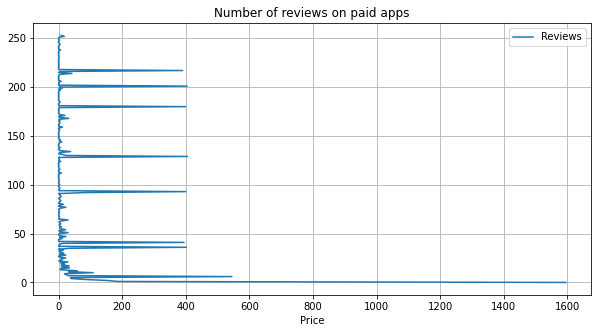

In [406]:
reviews_on_price.plot(x='Price', y='Reviews',figsize=(10,5),grid=True,)
plt.title("Number of reviews on paid apps")
plt.show()

In [407]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [408]:
ps_df2.shape

(64295, 5)

In [409]:
ps_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
